**Q1. Problem Statement: Hierarchical Clustering**

Load the "Country-data.csv" dataset into a DataFrame and perform the following
tasks:
1.	Create a separate DataFrame with only numeric data by removing the "country" column
2. Scale the data using the Standard Scaler to create a scaled DataFrame
3. Plotting dendrograms with the complete linkage method
4. Creating cluster labels using cut tree
5. Perform the 4-Component PCA on DataFrame
6. Now, from final the DataFrame, analyze how the low GDP rate corresponds to    the child mortality rate around the world

**Step-1:** Importing required libraries.

In [1]:
#Importing required libraries
import matplotlib.pyplot as plt  
import pandas as pd 
import seaborn as sns 
%matplotlib inline
import numpy as np  
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

**Step-2:** Loading the CSV data into a DataFrame.

In [2]:
#Loading the dataset
df = pd.read_csv('/content/Country-data.csv')  
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


**Step-3:** Seperating the numerical data to create a new DataFrame.

In [3]:
X = df.drop('country',axis =1)  
X.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


**Step-4:** Scaling the data using the Standard Scaler to create a scaled DataFrame.

In [4]:
# Standardization of the dataset before performing PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:5,:5]

array([[ 1.29153238, -1.13827979,  0.27908825, -0.08245496, -0.8082454 ],
       [-0.5389489 , -0.47965843, -0.09701618,  0.07083669, -0.3753689 ],
       [-0.27283273, -0.09912164, -0.96607302, -0.64176233, -0.22084447],
       [ 2.00780766,  0.77538117, -1.44807093, -0.16531531, -0.58504345],
       [-0.69563412,  0.1606679 , -0.28689415,  0.4975675 ,  0.10173177]])

In [5]:
X_scaled_df = pd.DataFrame(X_scaled,columns=X.columns)
X_scaled_df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


**Step-5:** Plotting dendograms with the complete linkage method.

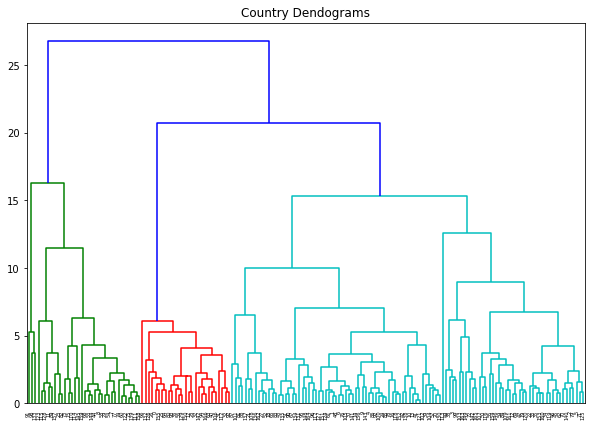

In [6]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Country Dendograms")  
dend = shc.dendrogram(shc.linkage(X_scaled_df, method='ward'))

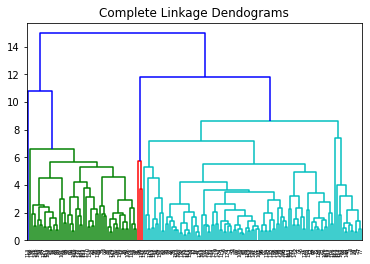

In [7]:
# complete linkage
cl_mergings = linkage(X_scaled_df, method="complete", metric='euclidean')
plt.title("Complete Linkage Dendograms") 
dendrogram(cl_mergings)
plt.show()

**Step-6:** Creating cluster labels using cut tree.

In [8]:
# the single linkage clustering does not perform well in generating the clusters hence we go for complete linkage
# 4 clusters using complete linkage
cl_cluster_labels = cut_tree(cl_mergings, n_clusters=4).reshape(-1, )
cl_cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0])

In [9]:
X_scaled_df["Hierarchical_Cluster_labels"] = cl_cluster_labels
X_scaled_df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Hierarchical_Cluster_labels
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,0
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,1
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,1
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,0
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,1
...,...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913,0
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323,1
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754,1
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754,0


**Step-7:** Performing  4-Component PCA on DataFrame.

In [10]:
#Performing PCA with 4 components

from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=4)
X_pca_final = pca_final.fit_transform(X_scaled)
print(X.shape)
print(X_pca_final.shape)

(167, 9)
(167, 4)


In [11]:
X_pca_final_df = pd.DataFrame(X_pca_final,columns=['PC1','PC2','PC3','PC4'])
X_pca_final_df.head()

,PC1,PC2,PC3,PC4
0,-2.913787,0.088354,0.721003,0.996699
1,0.429358,-0.587859,0.321052,-1.171193
2,-0.282988,-0.446657,-1.225135,-0.850127
3,-2.930969,1.699437,-1.521734,0.875966
4,1.031988,0.130488,0.192922,-0.844808


**Step-8:** Adding cluster labels to the final PCA DataFrame.

In [12]:
X_pca_final_df['Hierarchical_Cluster_Labels'] = cl_cluster_labels

In [13]:
X_pca_final_df.head()

,PC1,PC2,PC3,PC4,Hierarchical_Cluster_Labels
0,-2.913787,0.088354,0.721003,0.996699,0
1,0.429358,-0.587859,0.321052,-1.171193,1
2,-0.282988,-0.446657,-1.225135,-0.850127,1
3,-2.930969,1.699437,-1.521734,0.875966,0
4,1.031988,0.130488,0.192922,-0.844808,1


**Step-9:** Analyzing how low GDP rate corresponds to the child mortality rate around the world.

Text(0.5, 1.0, 'How Low GDP Rate Corresponds to the Child Mortality Rate')

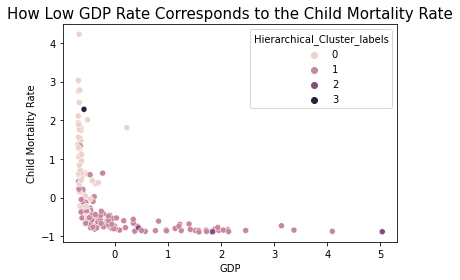

In [14]:

ax = sns.scatterplot(x='gdpp',y='child_mort',data = X_scaled_df,hue='Hierarchical_Cluster_labels')
ax.set_xlabel('GDP', fontsize = 10)
ax.set_ylabel('Child Mortality Rate', fontsize = 10)
ax.set_title('How Low GDP Rate Corresponds to the Child Mortality Rate', fontsize = 15)

**Observation:** Low gdpp corrsponds to low household income and hence higher child mortality rate.

**Q2. Problem Statement: K Means Clustering**<br>
Write a Python program that reads the Credit Card Customer Data.csv (provided on LMS) The following are the tasks that need to be taken into consideration while constructing the solution to Segregate customers based on the data provided with the help of k-means clustering
1.	Load the Given CSV file into a DataFrame
2.	Find missing values and drop the unnecessary columns 
3.	Univariate and bivariate analysis
4.	Standardize the whole dataset
5.	Find the within-cluster sum of square
6.	Find silhouette score
7.	Use a line plot using matplotlib to find scores for different sizes of K and choose the best size for the cluster and build the final model
8.	Observe Cluster behavior with different columns.
Print Co-ordinates of all centroids and silhouette scores for the final model

**Step-1:** importing the required libraries.

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # for plotting 
import seaborn as sns # for better interactive plotting
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler #to standardise the data
from sklearn.metrics import silhouette_score #for evaluation of model
import warnings
warnings.filterwarnings('ignore')

**Step-2:** Loading the CSV data into a DataFrame. 

In [43]:
df = pd.read_csv('Credit Card Customer Data.csv')
df

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0


**Step-3:** Check the data types for variables

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [45]:
df.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [46]:
df.columns # total columns lsit of data frame

Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')

**Step-4:** Missing Value analysis.

In [47]:
df.isnull().sum() #no missing value has found

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

**Step-5:** Drop unnecessary column.

In [48]:
df.drop(columns=['Sl_No', 'Customer Key'],inplace=True) 

**Step-6:** Univariate analysis

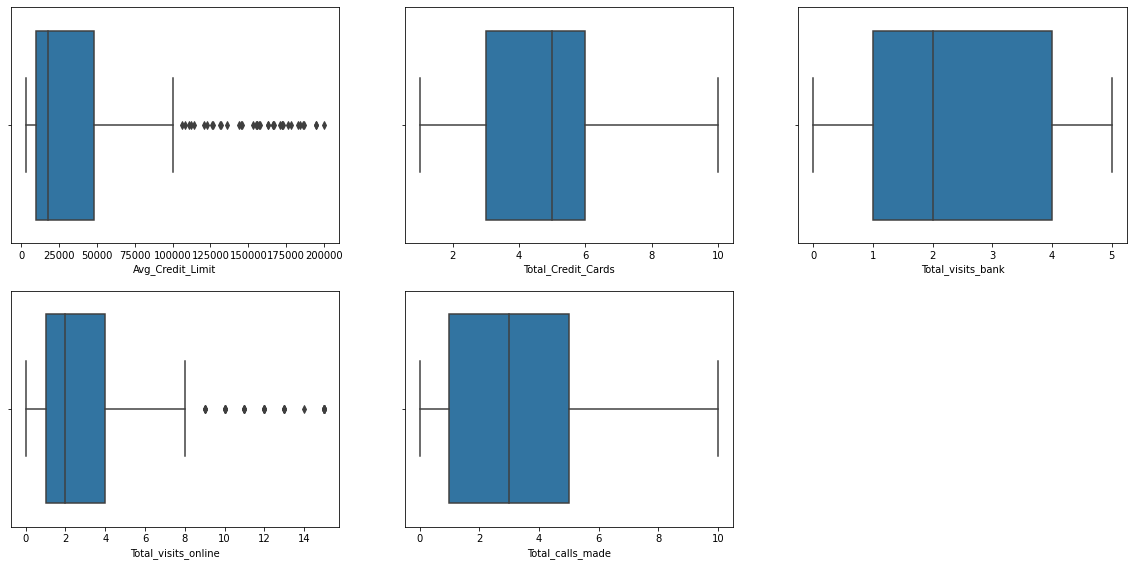

In [49]:
i=1
plt.figure(figsize=(20,20))
for j in df.columns:
    plt.subplot(4,3,i)
    sns.boxplot(data=df,x=j)
    i+=1

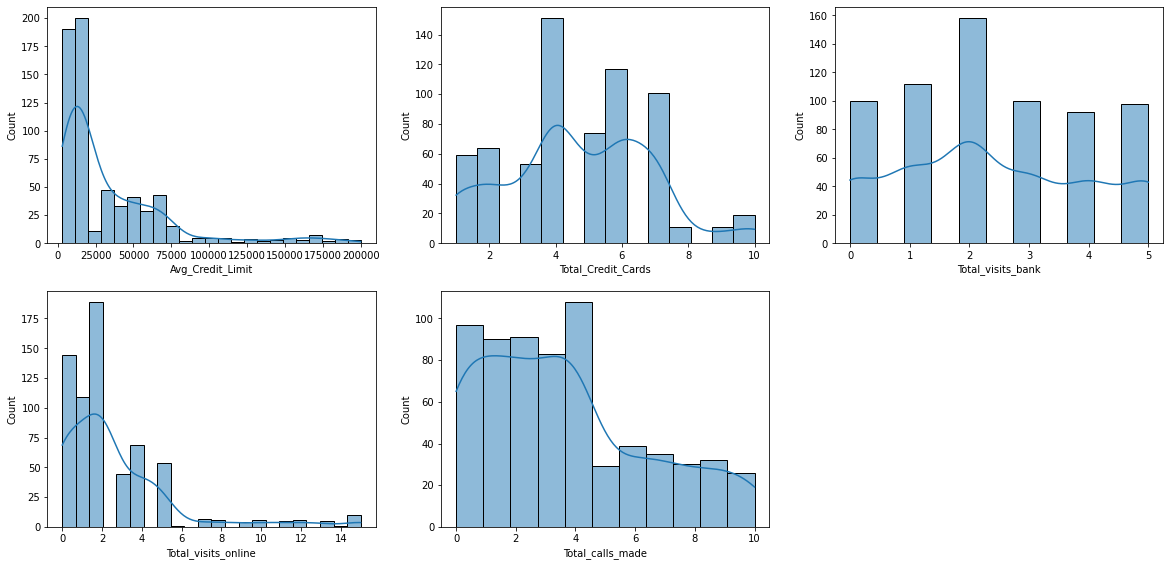

In [50]:
i=1
plt.figure(figsize=(20,20))
for j in df.columns:
    plt.subplot(4,3,i)
    sns.histplot(data=df,x=df[j],kde=True)
    i+=1

 Here we have some outlier but we dont remove it due to the loss of data

**Step-7:** Bivariate analysis

In [51]:
df.corr() # correlation matrix

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Avg_Credit_Limit,1.000000,0.608860,-0.100312,0.551385,-0.414352
Total_Credit_Cards,0.608860,1.000000,0.315796,0.167758,-0.651251
Total_visits_bank,-0.100312,0.315796,1.000000,-0.551861,-0.506016
Total_visits_online,0.551385,0.167758,-0.551861,1.000000,0.127299
Total_calls_made,-0.414352,-0.651251,-0.506016,0.127299,1.000000


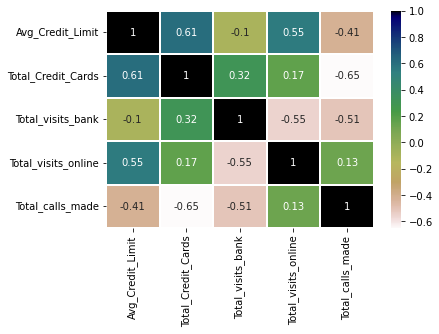

In [52]:
sns.heatmap(df.corr(),cmap='gist_earth_r',linewidths=1,annot=True)# corelation matrix with heat mape

1- avg_credit_limit and total_credit_cards has the high +ve correlation of 0.61..
2- avg_credit_limit and total_visits_online has the high +ve correlation of 0.55..
3-total_credit_card and total_calls_made has the high -ve correlation of -0.65....
4-total_visit_bank and total_visit_online has high -ve correlation of -0.55....
5-total_calls_made and total_visit_bank has high -ve correlation of -0.51.....

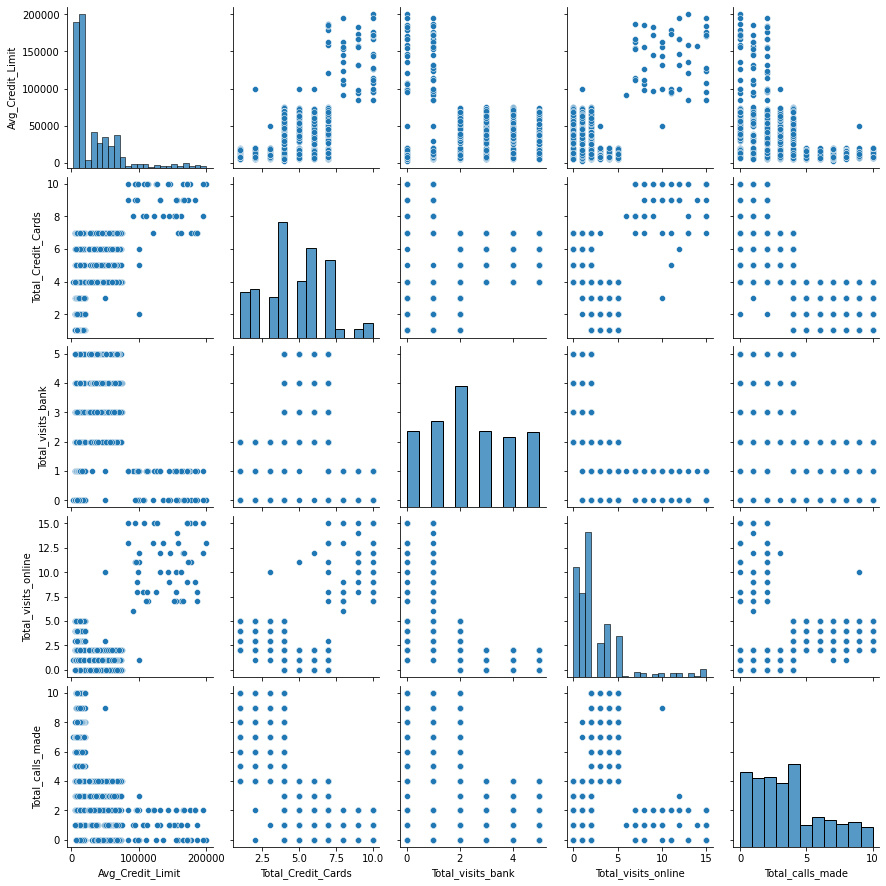

In [53]:
sns.pairplot(df) #pair plot of numeric columns

**Step-8:** Standardize the whole dataset

In [54]:
sc=StandardScaler()# scaling of data
scaled=sc.fit_transform(df)
scaled_data=pd.DataFrame(scaled,columns=df.columns)
scaled_data

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739
...,...,...,...,...,...
655,1.713589,2.443892,-0.860451,2.520519,-1.251537
656,1.314621,2.443892,-0.860451,3.543188,-0.553005
657,2.937092,1.520613,-0.860451,2.179629,-0.902271
658,3.655235,2.443892,-0.860451,4.224968,-1.251537


**Step-9:** Find Within-Cluster Sum of Square

In [55]:
wcss=[]
for i in range(1,13):
    km=KMeans(n_clusters=i)
    km.fit(scaled_data)
    wcss.append(km.inertia_)

**Step-10:** Find silhouette score

In [56]:
slh_score=[]
for i in range(2,13):
    km=KMeans(n_clusters=i)
    km.fit(df)
    slh_score.append(silhouette_score(scaled_data,km.labels_))

**Use a line plot using matplotlib to find scores for different sizes of K and choose the best size for the cluster and build the final model**

**Step-11:** Plot all score for all model for diffrent clusters sizes  

Text(0.5, 0, 'k-value')

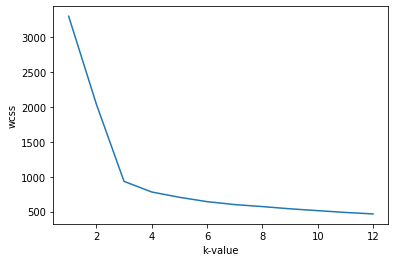

In [57]:
plt.plot(range(1,13),wcss)
plt.ylabel('wcss')
plt.xlabel('k-value')

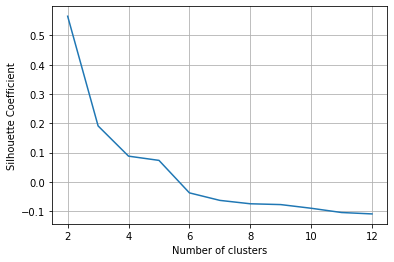

In [58]:
plt.plot(range(2,13),slh_score)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

Here we have choose k- value such that wcss is minimum and silihoutte coefficint is more so we choose k=3

**Step-12:** Build final model.

In [59]:
km1=KMeans(n_clusters=3)
km1.fit(scaled_data)
y=km1.predict(scaled_data)
df['label']=y

**Step-13:** Observe Cluster behavior with different columns.

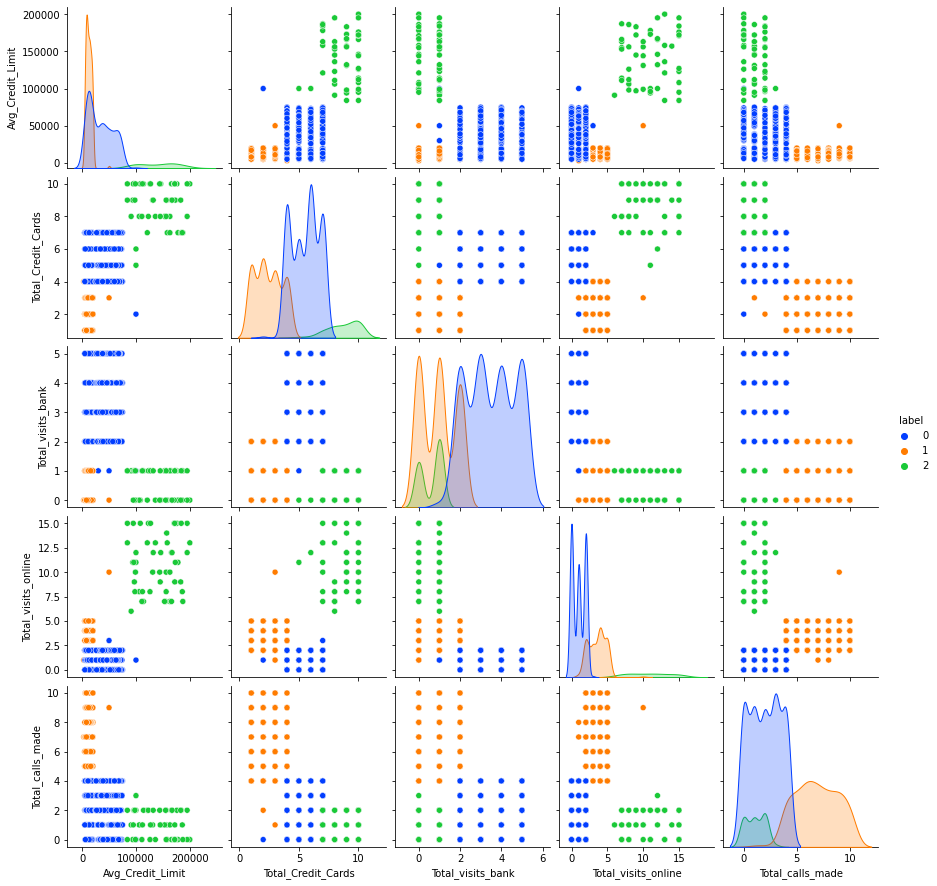

In [60]:
#custer wise data presentation for each column
sns.pairplot(df,hue='label',palette='bright')

**Step-14:** Print Co-ordinates of all centeroids.

In [61]:
center=km1.cluster_centers_# centre of clustering 
center# center coordinated for each cluster centroid.

array([[-0.02106178,  0.37368962,  0.6663945 , -0.55367163, -0.55300488],
       [-0.59579625, -1.05962278, -0.9015185 ,  0.32299678,  1.14810882],
       [ 2.83176409,  1.86222621, -1.10576269,  2.82731942, -0.87432983]])

**Step-15:** Print silhouette_score for final model.

In [62]:
Kmean_silihoute=silhouette_score(scaled_data,km1.labels_)
Kmean_silihoute # silihoute score for our final model.

0.5157182558881063


**Inference:** Our goal was to cluster our data with each other so we can eassily identify their type and we can give appropriate service to them, and by using clustering algorithm we observed that catagories group of 3 K -means perform best.and we also observe some general observation like ,

**segment-0:**total_credit_card[4-6] and avg_credit_limit(0-75000)----   
**segment-1:**total_credit_card(0-3) and avg_credit_limit(0-25000)----<br>
**segment-2:**total_credit_card(6-10) and avg_credit_limit>75000 -----<br>
we can observe that higher the avg_credit_limit higher is total_credit_card aquired by customer<br>

**Q3. Problem Statement: DBSCAN Clustering**

Load the "Mall_Customers.csv" dataset into a DataFrame to perform the following tasks:
1.	Find the correlation among the all the columns and drop the column/s with the least correlation
2.	Encode the "Gender" column using get_dummies() function
3.	Perform Density-Based Spatial Clustering of Applications with Noise (DBSCAN) clustering with eps=12.5 and min_samples=4
4.	Print the size of each cluster and also the size of outliers' cluster
5.	Using a scatter plot shows how annual income corresponds to the spending rates of customers

**Step-1:** Importing the required libraries.

In [63]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

**Step-2:** Loading the CSV data into a DataFrame.

In [64]:
df=pd.read_csv("/content/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [66]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [67]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

**Step-3:** Finding correlation among the columns.

In [68]:
corr_mat = df.corr()
corr_mat

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


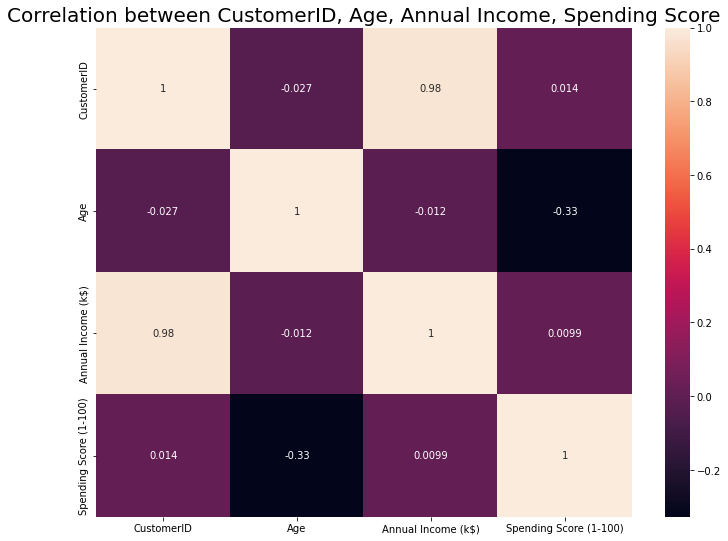

In [69]:
#plotting correlation matrix
plt.subplots(figsize=(12,9))
sns.heatmap(corr_mat,annot=True)
plt.title('Correlation between CustomerID, Age, Annual Income, Spending Score', fontsize = 20)
plt.show()

**Step-4:** Dropping "CustomerID" column since it has negligible correlation with other columns and labeling the "Gender" column with 0 and 1.

In [70]:
df=df.drop(['CustomerID'],axis=1)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [71]:
df= pd.get_dummies(df, columns = ['Gender'])
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0


**step-5:** Applying Density Based Spacial Clustering of Applications with noise (DBSCAN) on the data. Here we are creating clusters with eps = 12.5 and min_samples = 4.

In [72]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from itertools import product

In [73]:
DBS_clustering = DBSCAN(eps=12.5, min_samples=4).fit(df)

DBSCAN_clustered = df.copy()
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ # append l

**step-6:** Calculate the size of each cluster created and also the number of outliers.

In [74]:
#Calculating the size of each cluster created
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,18
0,112
1,8
2,34
3,24
4,4


**Step-7:**DBSCAN created 5 clusters plus outliers cluster (-1). Sizes of clusters 0-4 vary significantly - some have only 4 or 8 observations. There are 18 outliers. Now we can find out how annual income effects the spending rate of the potential customers using a scatter plot.

Text(0.5, 1.0, 'How annual income corresponds to the spending rate ')

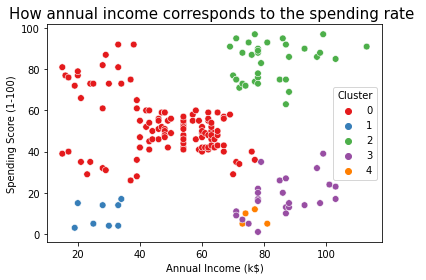

In [75]:
#Defining the outliers
outliers = DBSCAN_clustered[DBSCAN_clustered['Cluster']==-1]

ax=sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', palette='Set1', legend='full', s=45)

ax.set_xlabel('Annual Income (k$)', fontsize = 10)
ax.set_ylabel('Spending Score (1-100)', fontsize = 10)
ax.set_title('How annual income corresponds to the spending rate ', fontsize = 15)

**Results:** From the sactter plot we can infer that people who earn around 40k$ to 70k$ anually, spend more money in the mall.

## Day 54- DIY Solution
**Q4. Problem Statement: Apriori Algorithm**<br>
Write a Python program that reads the Groceries data.csv (provided on LMS) file into a DataFrame. The following are the tasks that need to be taken into consideration while constructing the solution to using the apriori algorithm and list out items that are sold most frequently with other items.
Dataset file contains tabular data, where it has items, date, member number, day of the month, day of the week, etc. 
1.	Install mlxtend library for further process
2.	Load the Groceries data.csv data into a Data frame
3.	Print customer data where the member number is 1001
4.	Create a new column as “item count”, and give the count as 1(because all customers bought 1 item on each day only)  
5.	Drop unnecessary columns like "month","day","year","day_of_week" 
6.	Create a new data frame where all data is grouped by member id and items they bought and set their value as item count.
7.	Use the Apriori algorithm and generate frequent itemsets that have the               support of at least 7%
8.	Generating the rules with their corresponding support, confidence, and lift
9.	Filtering out the values with lift > = 1 and confidence > = 0.5

**Step-1:** Intsall mlxtend library for furthure tasks.

In [76]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Step-2:** Importing the required libraries

In [77]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

**Step-3:** Loading the CSV data into a DataFrame.

In [83]:
df = pd.read_csv("/content/Groceries data.csv")
df

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
1,2552,2015-05-01,whole milk,2015,5,1,4
2,2300,2015-09-19,pip fruit,2015,9,19,5
3,1187,2015-12-12,other vegetables,2015,12,12,5
4,3037,2015-01-02,whole milk,2015,1,2,4
...,...,...,...,...,...,...,...
38760,4471,2014-08-10,sliced cheese,2014,8,10,6
38761,2022,2014-02-23,candy,2014,2,23,6
38762,1097,2014-04-16,cake bar,2014,4,16,2
38763,1510,2014-03-12,fruit/vegetable juice,2014,3,12,2


**Print customer data where the member number is 1001**

In [84]:
df[df.Member_number == 1001] # data of 1001 customer 

,Member_number,Date,itemDescription,year,month,day,day_of_week
364,1001,2015-01-20,frankfurter,2015,1,20,1
5695,1001,2015-02-05,frankfurter,2015,2,5,3
6612,1001,2015-04-14,beef,2015,4,14,1
9391,1001,2014-07-02,sausage,2014,7,2,2
11046,1001,2014-12-12,whole milk,2014,12,12,4
16513,1001,2015-01-20,soda,2015,1,20,1
21844,1001,2015-02-05,curd,2015,2,5,3
22761,1001,2015-04-14,white bread,2015,4,14,1
25540,1001,2014-07-02,whole milk,2014,7,2,2
27195,1001,2014-12-12,soda,2014,12,12,4


**Create a new column as “item count”, and give the count as 1(because all customers bought 1 item on each day only)**

In [85]:
df["item_count"] = 1

In [86]:
df.columns

Index(['Member_number', 'Date', 'itemDescription', 'year', 'month', 'day',
       'day_of_week', 'item_count'],
      dtype='object')

**Step-4:** Dropping unwanted columns.

In [87]:
df = df.drop(columns = ["month","day","year","day_of_week"])

In [89]:
df

,Member_number,Date,itemDescription,item_count
0,1808,2015-07-21,tropical fruit,1
1,2552,2015-05-01,whole milk,1
2,2300,2015-09-19,pip fruit,1
3,1187,2015-12-12,other vegetables,1
4,3037,2015-01-02,whole milk,1
...,...,...,...,...
38760,4471,2014-08-10,sliced cheese,1
38761,2022,2014-02-23,candy,1
38762,1097,2014-04-16,cake bar,1
38763,1510,2014-03-12,fruit/vegetable juice,1


In [90]:
df.Member_number.value_counts()

3180    36
3737    33
3050    33
2051    33
2625    31
        ..
2503     2
3301     2
1775     2
3723     2
2417     2
Name: Member_number, Length: 3898, dtype: int64

**Step-5:** Grouping by data using member_number & item description column and set their value as per item count.

In [91]:
basket = (df.groupby(['Member_number','itemDescription'])['item_count']
          .sum()
          .unstack()
          .reset_index()
          .fillna(0)
          .set_index('Member_number'))
basket

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Step-6:** Setting -ve value as 0 and +ve value as 1.

In [92]:
def encode_units(x):
    if x <= 0:
        return 0    
    if x >= 1:
        return 1
basket_sets = basket.applymap(encode_units)
basket_sets.head()

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


**Use the Apriori algorithm and generate frequent itemsets that have the support of at least 7%**

**Step-7:** Generating frequent item sets and rules with their corresponding support, confidence and lift.

In [93]:
#Generating frequent item sets that have a support of at least 7%
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)

#Generating the rules with their corresponding support, confidence and lift
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.5)

rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(bottled beer),(whole milk),0.158799,0.458184,0.085428,0.537964,1.174124,0.012669,1.172672
1,(whole milk),(bottled beer),0.458184,0.158799,0.085428,0.186450,1.174124,0.012669,1.033988
2,(bottled water),(other vegetables),0.213699,0.376603,0.093894,0.439376,1.166680,0.013414,1.111969
3,(other vegetables),(bottled water),0.376603,0.213699,0.093894,0.249319,1.166680,0.013414,1.047450
4,(bottled water),(rolls/buns),0.213699,0.349666,0.079271,0.370948,1.060863,0.004548,1.033832


**Filtering out the values with lift > = 1 and confidence > = 0.5**

**Step-8:** Filtering out the values.

In [94]:
#Filtering out the values with lift > = 1 and confidence > = 0.5
rules[ (rules['lift'] >= 1 ) & (rules['confidence'] >= 0.5) ].head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(bottled beer),(whole milk),0.158799,0.458184,0.085428,0.537964,1.174124,0.012669,1.172672
8,(bottled water),(whole milk),0.213699,0.458184,0.112365,0.525810,1.147597,0.014452,1.142615
11,(canned beer),(whole milk),0.165213,0.458184,0.087224,0.527950,1.152268,0.011526,1.147795
19,(domestic eggs),(whole milk),0.133145,0.458184,0.070292,0.527938,1.152242,0.009287,1.147766
20,(newspapers),(whole milk),0.139815,0.458184,0.072345,0.517431,1.129310,0.008284,1.122775


**Inference:** We have list out all the items and we observe that milk is most sold out item with other items.